In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_data =pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data =pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submission_data =pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
# data types
train_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
# Convert CryoSleep data type to boolean fro Object
train_data['CryoSleep']=train_data['CryoSleep'].astype('bool')

In [6]:
# Convert VIP data type to boolean fro Object
train_data['VIP']=train_data['VIP'].astype('bool')

In [7]:
train_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [8]:
# Count missing values  in each column
missing_data = train_data.isnull()
# missing_data.head(5)

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

PassengerId
False    8693
Name: PassengerId, dtype: int64

HomePlanet
False    8492
True      201
Name: HomePlanet, dtype: int64

CryoSleep
False    8693
Name: CryoSleep, dtype: int64

Cabin
False    8494
True      199
Name: Cabin, dtype: int64

Destination
False    8511
True      182
Name: Destination, dtype: int64

Age
False    8514
True      179
Name: Age, dtype: int64

VIP
False    8693
Name: VIP, dtype: int64

RoomService
False    8512
True      181
Name: RoomService, dtype: int64

FoodCourt
False    8510
True      183
Name: FoodCourt, dtype: int64

ShoppingMall
False    8485
True      208
Name: ShoppingMall, dtype: int64

Spa
False    8510
True      183
Name: Spa, dtype: int64

VRDeck
False    8505
True      188
Name: VRDeck, dtype: int64

Name
False    8493
True      200
Name: Name, dtype: int64

Transported
False    8693
Name: Transported, dtype: int64



In [9]:
# Count missing values  in each column
missing_data = test_data.isnull()
# missing_data.head(5)

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

PassengerId
False    4277
Name: PassengerId, dtype: int64

HomePlanet
False    4190
True       87
Name: HomePlanet, dtype: int64

CryoSleep
False    4184
True       93
Name: CryoSleep, dtype: int64

Cabin
False    4177
True      100
Name: Cabin, dtype: int64

Destination
False    4185
True       92
Name: Destination, dtype: int64

Age
False    4186
True       91
Name: Age, dtype: int64

VIP
False    4184
True       93
Name: VIP, dtype: int64

RoomService
False    4195
True       82
Name: RoomService, dtype: int64

FoodCourt
False    4171
True      106
Name: FoodCourt, dtype: int64

ShoppingMall
False    4179
True       98
Name: ShoppingMall, dtype: int64

Spa
False    4176
True      101
Name: Spa, dtype: int64

VRDeck
False    4197
True       80
Name: VRDeck, dtype: int64

Name
False    4183
True       94
Name: Name, dtype: int64



In [10]:
# Correlation between the target;transported and other variables
train_data.corr()['Transported'].sort_values()

RoomService    -0.244611
Spa            -0.221131
VRDeck         -0.207075
Age            -0.075026
VIP            -0.024602
ShoppingMall    0.010141
FoodCourt       0.046566
CryoSleep       0.451744
Transported     1.000000
Name: Transported, dtype: float64

In [11]:
# Total count per HomePlanet in train_data
train_data['HomePlanet'].value_counts()



Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [12]:
test_data['HomePlanet'].value_counts()

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

In [13]:
# Replacing null values with Earth,word with most frequency in data set 
train_data['HomePlanet'].replace(np.nan,'Earth',inplace=True)

In [14]:
test_data['HomePlanet'].replace(np.nan,'Earth',inplace=True)

In [15]:
train_data['HomePlanet'].isnull().sum()

0

In [16]:
train_data['Cabin'].isnull().sum()

199

In [17]:
train_data['Destination'].isnull().sum()

182

In [18]:
train_data['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [19]:
test_data['Destination'].value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [20]:
# Replace nan cell with max value(TRAPPIST-1e)
train_data['Destination'].replace(np.nan,'TRAPPIST-1e',inplace=True)

In [21]:
test_data['Destination'].replace(np.nan,'TRAPPIST-1e',inplace=True)

In [22]:
train_data['Destination'].isnull().sum()

0

In [23]:
train_data['Name'].isnull().sum()

200

In [24]:
# Replacing missing age value with mean in train_data.csv
mean =train_data['Age'].mean()

train_data['Age'].replace(np.nan,mean,inplace=True)

In [25]:
mean =test_data['Age'].mean()
test_data['Age'].replace(np.nan,mean,inplace=True)

In [26]:
train_data.head()
# train_data['RoomService'].value_counts()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [27]:
# Fill the empty name cells with 'Unknown' in train_data.csv
train_data['Name'].fillna('Unknown',inplace =True)

# display empty cells
train_data['Name'].isnull().sum()

0

In [28]:
# Fill the empty name cells with 'Unknown' in test_data.csv
test_data['Name'].fillna('Unknown',inplace =True)

# display empty cells
test_data['Name'].isnull().sum()

0

In [29]:
# Spa column
# Convert to type float since Spa represents currency
train_data['Spa']=train_data['Spa'].astype('float')

# fill null rows with median
median_spa =train_data['Spa'].median()
train_data['Spa'].fillna(median_spa,inplace=True)


In [30]:
train_data['Spa'].isnull().sum()

0

In [31]:
# Convert to type float since Spa represents currency
test_data['Spa']=test_data['Spa'].astype('float')

# fill null rows with median
median_spa =train_data['Spa'].median()
test_data['Spa'].fillna(median_spa,inplace=True)

In [32]:

# RoomService column
# Convert to type float since RoomService represents currency
train_data['RoomService']=train_data['RoomService'].astype('float')

# fill null rows with median
median_roomservice =train_data['RoomService'].median()
train_data['RoomService'].fillna(median_roomservice,inplace=True)

In [33]:
# Convert to type float since RoomServicerepresents currency in test_data.csv
test_data['RoomService']=test_data['RoomService'].astype('float')

# fill null rows with median
median_roomservice =train_data['RoomService'].median()
test_data['RoomService'].fillna(median_roomservice,inplace=True)

In [34]:
# VRDeck column
# Convert to type float since VRDeck represents currency
train_data['VRDeck']=train_data['VRDeck'].astype('float')

# fill null rows with median
median_vrdeck =train_data['VRDeck'].median()
train_data['VRDeck'].fillna(median_vrdeck,inplace=True)

In [35]:
# VRDeck column
# Convert to type float since VRDeck represents currency:test_data.csv dataset
test_data['VRDeck']=test_data['VRDeck'].astype('float')

# fill null rows with median
median_vrdeck =test_data['VRDeck'].median()
test_data['VRDeck'].fillna(median_vrdeck,inplace=True)

In [36]:
# FoodCourt column
# Convert to type float since FoodCourt represents currency
train_data['FoodCourt']=train_data['FoodCourt'].astype('float')

# fill null rows with median
median_foodcourt =train_data['FoodCourt'].median()
train_data['FoodCourt'].fillna(median_foodcourt,inplace=True)

In [37]:
# FoodCourt column
# Convert to type float since FoodCourt represents currency:test_data.csv
test_data['FoodCourt']=test_data['FoodCourt'].astype('float')

# fill null rows with median
median_foodcourt =test_data['FoodCourt'].median()
test_data['FoodCourt'].fillna(median_foodcourt,inplace=True)

In [38]:
# ShoppingMall column
# Convert to type float since ShoppingMall represents currency
train_data['ShoppingMall']=train_data['ShoppingMall'].astype('float')

# fill null rows with median
median_shoppingmall =train_data['ShoppingMall'].median()
train_data['ShoppingMall'].fillna(median_shoppingmall,inplace=True)

In [39]:
# ShoppingMall column
# Convert to type float since ShoppingMall represents currency:test_data.csv
test_data['ShoppingMall']=test_data['ShoppingMall'].astype('float')

# fill null rows with median
median_shoppingmall =test_data['ShoppingMall'].median()
test_data['ShoppingMall'].fillna(median_shoppingmall,inplace=True)

In [40]:
train_data['ShoppingMall'].isnull().sum()

0

### Cabin Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [41]:

# train_data.dropna(subset=['Cabin'],axis=0,inplace=True)
train_data['Cabin'].isnull().sum()

199

In [42]:
# Split the cabin to get the sides: P or S
train_data["Cabin_side"] = train_data.Cabin.str.split("/", expand=True)[2]

In [43]:
# Sum of null values in Cabin row in test_csv
# test_data['Cabin'].isnull().sum()
# Split the cabin to get the sides: P or S
test_data["Cabin_side"] = test_data.Cabin.str.split("/", expand=True)[2]


In [44]:
# Emppty 
test_data['Cabin_side'].isnull().sum()

100

In [45]:
# display the count of passengers in cabin sides S & P in train_data.csv
train_data['Cabin_side'].value_counts()

S    4288
P    4206
Name: Cabin_side, dtype: int64

In [46]:
# Convert Cabin side from object to string data type
train_data['Cabin_side'] =train_data['Cabin_side'].astype('string')


In [47]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Cabin_side    8494 non-null   string 
dtypes: bool(3), float64(6), object(5), string(1)
memory usage: 840.6+ KB


In [48]:
test_data['Cabin_side'] =test_data['Cabin_side'].astype('string')

In [49]:
# replaced missing values with 'S' ,using central tendecy,Mode
missing_values = 'S'
train_data['Cabin_side'].replace(np.nan,missing_values,inplace=True)

In [50]:
missing_value = 'S'
test_data['Cabin_side'].replace(np.nan,missing_value,inplace=True)

In [51]:
# train_data.drop(train_data['Cabin'],axis=1,inplace=True)
# Dropped the Cabin column from the dataset
# train_data.drop(['Cabin'],axis=1 ,inplace=True)

train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S


In [52]:
test_data['Cabin_side'].value_counts()

S    2193
P    2084
Name: Cabin_side, dtype: Int64

In [53]:
# test_data.drop(['Cabin'],axis=1 ,inplace=True)

test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,S


In [54]:
# Display more verbose information about the test_data .
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4277 non-null   object 
 13  Cabin_side    4277 non-null   string 
dtypes: float64(6), object(7), string(1)
memory usage: 467.9+ KB


In [55]:
train_data.shape


(8693, 15)

In [56]:
# find the number of people who paid for VIP :
train_data['VIP'].value_counts()

False    8291
True      402
Name: VIP, dtype: int64

In [57]:
test_data['VIP'].value_counts()

False    4110
True       74
Name: VIP, dtype: int64

In [58]:
# replace null values with bool True
test_data['VIP'].replace(np.nan,True,inplace=True)

In [59]:

test_data['CryoSleep'].value_counts()

False    2640
True     1544
Name: CryoSleep, dtype: int64

In [60]:
# Null values in CryoSleep column
test_data['CryoSleep'].isnull().sum()

93

In [61]:
# replace the null values with bool False
test_data['CryoSleep'].replace(np.nan,False,inplace=True)

In [62]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4177 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4277 non-null   object 
 13  Cabin_side    4277 non-null   string 
dtypes: bool(2), float64(6), object(5), string(1)
memory usage: 409.4+ KB


In [63]:
# test_data['HomePlanet'].value_counts()
test_data['HomePlanet'].replace(np.nan,'Earth',inplace=True)

In [64]:
X = train_data.copy()
y = X.pop('Transported')

# Label Encoding
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
discrete_features = X.dtypes == int


from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# mi_scores = make_mi_scores(X, y, discrete_features)
# mi_scores[:3]  # show a few features with their MI scores

In [65]:
train_data.corr()['Transported']

CryoSleep       0.451744
Age            -0.074249
VIP            -0.024602
RoomService    -0.241124
FoodCourt       0.045583
ShoppingMall    0.009391
Spa            -0.218545
VRDeck         -0.204874
Transported     1.000000
Name: Transported, dtype: float64

In [66]:
train_data[['Cabin_side','Transported']].corr()

,Transported
Transported,1.0


In [67]:
dummy_cabin = pd.get_dummies(train_data['Cabin_side'],prefix='Cabin_side')
dummy_cabin.head()

,Cabin_side_P,Cabin_side_S
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [68]:
dummy_destination = pd.get_dummies(train_data['Destination'],prefix='destination')

In [69]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S


In [70]:
df_Cryosleep = train_data.groupby(['CryoSleep'])['Transported'].count()
df_Cryosleep.head()

CryoSleep
False    5439
True     3254
Name: Transported, dtype: int64

In [71]:
train_data.corr()['Transported'].sort_values(ascending=False)

Transported     1.000000
CryoSleep       0.451744
FoodCourt       0.045583
ShoppingMall    0.009391
VIP            -0.024602
Age            -0.074249
VRDeck         -0.204874
Spa            -0.218545
RoomService    -0.241124
Name: Transported, dtype: float64

In [72]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S


In [73]:
#Drop column Destination Column
train_data = pd.concat([train_data,dummy_destination],axis=1)
# train_data.drop("Destination",axis=1,inplace=True)

In [74]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P,0,0,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S,0,0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S,0,0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S,0,0,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S,0,0,1


<AxesSubplot:xlabel='Age', ylabel='Transported'>

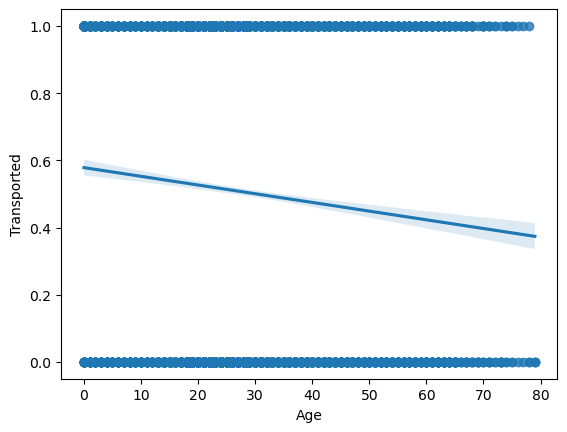

In [75]:
import seaborn as sns
sns.regplot(x="Age",y="Transported",data=train_data)

<AxesSubplot:xlabel='FoodCourt', ylabel='Transported'>

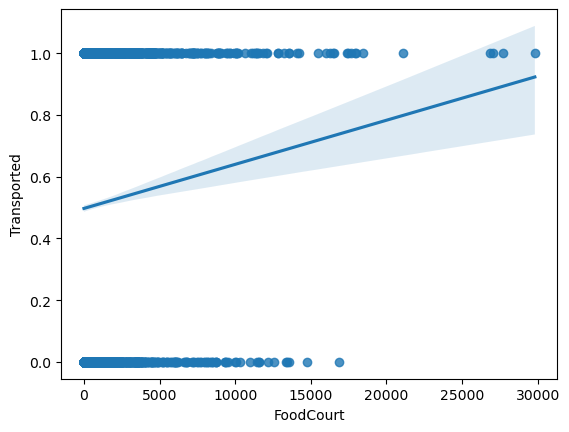

In [76]:
sns.regplot(x="FoodCourt",y="Transported",data=train_data)

In [77]:
# Age normalization
train_data['Age'] = train_data['Age']/train_data['Age'].max()

In [78]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_side,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,0.493671,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P,0,0,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,0.303797,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S,0,0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,0.734177,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S,0,0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,0.417722,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S,0,0,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,0.202532,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S,0,0,1


In [79]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,S


In [80]:
#Drop all rows with missing values
# test_data.dropna(inplace=True)
test_data.shape

(4277, 14)

In [81]:
test_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Cabin_side        0
dtype: int64

In [82]:
# Simple feature scaling
test_data['Age'] = test_data['Age']/test_data['Age'].max()

In [83]:
dummy_destination = pd.get_dummies(test_data['Destination'],prefix='destination')
test_data = pd.concat([test_data,dummy_destination],axis=1)
# test_data.drop("Destination",axis=1,inplace=True)

In [84]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_side,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,0.341772,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,S,0,0,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,0.240506,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,S,0,0,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,0.392405,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,S,1,0,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,0.481013,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,S,0,0,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,0.253165,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,S,0,0,1


In [85]:
test_data["Cabin_side"] = test_data.Cabin.str.split("/", expand=True)[2]
dummy_cabin01 = pd.get_dummies(test_data['Cabin_side'],prefix='Cabin_side')
dummy_cabin01.head()

,Cabin_side_P,Cabin_side_S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [86]:
train_data.corr()['Transported'].sort_values(ascending=False)

Transported                  1.000000
CryoSleep                    0.451744
destination_55 Cancri e      0.108722
FoodCourt                    0.045583
ShoppingMall                 0.009391
destination_PSO J318.5-22    0.000092
VIP                         -0.024602
Age                         -0.074249
destination_TRAPPIST-1e     -0.096319
VRDeck                      -0.204874
Spa                         -0.218545
RoomService                 -0.241124
Name: Transported, dtype: float64

In [87]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_side,destination_55 Cancri e,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,0.341772,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,S,0,0,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,0.240506,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,S,0,0,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,0.392405,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,S,1,0,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,0.481013,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,S,0,0,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,0.253165,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,S,0,0,1


In [88]:
test_data.shape

(4277, 17)

In [89]:
dummy_destination = pd.get_dummies(train_data['Destination'],prefix='destination')

In [90]:
#Drop column Destination Column
train_data = pd.concat([train_data,dummy_destination],axis=1)
train_data.drop("Destination",axis=1,inplace=True)

In [91]:
test_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Cabin_side', 'destination_55 Cancri e',
       'destination_PSO J318.5-22', 'destination_TRAPPIST-1e'],
      dtype='object')

In [92]:
dum_destination = pd.get_dummies(test_data['Destination'],prefix='destination')
#Drop column Destination Column
test_data = pd.concat([test_data,dum_destination],axis=1)
# test_data.drop("Destination",axis=1,inplace=True)

In [93]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Transported"]

features = ["CryoSleep", "FoodCourt", "Age"]
X = train_data[features]
X_test = test_data[features]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
predictions

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
